# Import necessary packages

In [1]:
import numpy as np
from battery_electrochem_TarotT18 import BatteryElectroChemEOD as Battery
import math
import matplotlib.pyplot as plt
import sys 
import pandas as pd
# plt.rcParams['text.usetex'] = True

## Import the actual current and voltage  

In [8]:
flight_number = 3
data_frame = pd.read_csv('C:/Users/Tharun/GWU/Battery Summer Project/Battery-Summer-Project/Week 1/current_inputs/battery_data_1.csv')
actual_voltage = data_frame['volt'].dropna().to_numpy()
Iapp = data_frame['curr'].dropna().to_numpy()

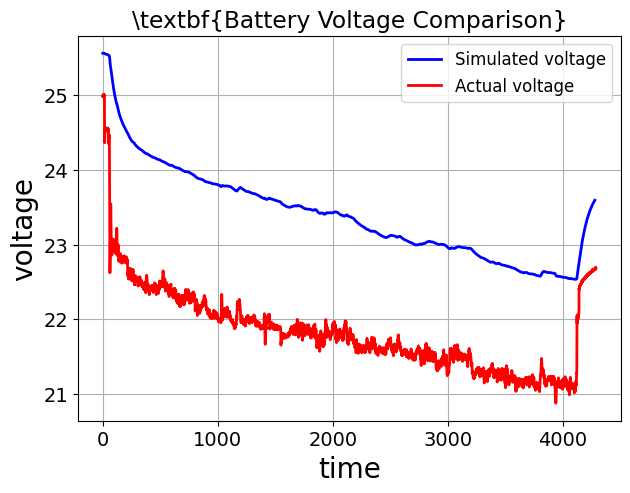

In [9]:
batt = Battery()

def future_loading(t, x=None):
    # Constant Loading
    t = int(t*10)
    
    return batt.InputContainer({'i': Iapp[t]})

results = batt.simulate_to(len(Iapp)*0.1-1, future_loading, dt=0.1, save_freq=0.1)
time = results[0]
current = results[1]
states = results[2]
outputs = results[3]
SOC = results[4]

time = np.arange(0, len(Iapp)*0.1-1, 0.1)
t = []
v = []

for i in outputs:
    v.append(i['v'])
# plt.subplots_adjust(bottom=0.8)   
plt.rcParams["figure.figsize"] = (7,5)
plt.plot(v,linewidth=2, color='blue', label='Simulated voltage')
plt.plot(actual_voltage,linewidth=2, color='red', label='Actual voltage')  
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.legend(prop={'size': 12})
plt.title(r'\textbf{Battery Voltage Comparison}')
plt.savefig('Voltage_Validate_{flight_number}.png'.format(flight_number=flight_number), format='png', dpi=140)

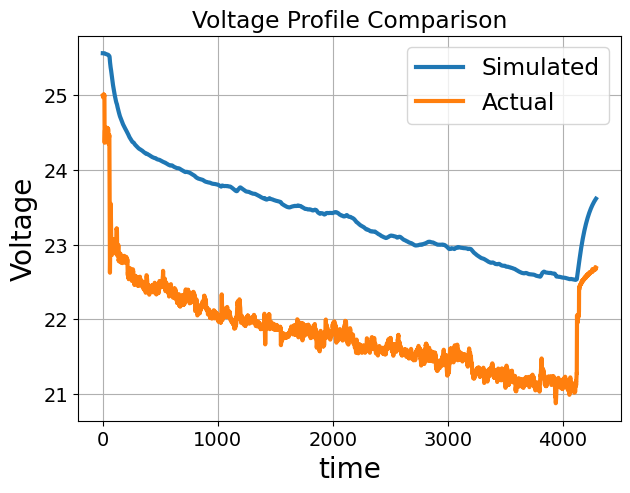

In [10]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

from battery_electrochem_TarotT18 import BatteryElectroChemEOD as Battery

class TarotBattery():
    def __init__(self, timeStep):
        self.battery = Battery()
        self.state = self.battery.initialize({"i":100},{"t":292.1,"v":24})
        self.t = 0
        self.timeStep = timeStep
    
    def update(self, input_current):
        self.state = self.battery.next_state(self.state, input_current, self.timeStep) 
        output = self.battery.output(self.state)['v']
        

        return output
    
# Create  the battery
sampleTime = 0.1
bat = TarotBattery(sampleTime)
# Iapp = np.loadtxt("Flight_1_current") # Actual trajectory - Flight 1

volt = []
for i in Iapp:
    totalCurrent = i
    volt.append(bat.update({"i":totalCurrent}))

time = np.arange(0, len(volt)*0.1-1, 0.1)
plt.plot(volt, label='Simulated')
plt.plot(actual_voltage, label='Actual')
plt.legend()
# plt.grid()
plt.xlabel('time')
plt.ylabel('Voltage')
plt.title('Voltage Profile Comparison')
plt.savefig('Battery_Voltage.png')
plt.grid()